#

In [62]:
# imports and setup 

import pandas as pd
import numpy as np
from math import isnan

from sklearn import tree, svm, metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import math as mt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [52]:
career = pd.read_csv('career_v2.csv',index_col=0)

In [53]:
rookie = pd.read_csv('rookie_v2.csv',index_col=0)

In [54]:
career

,Name,link,Games Played,MinPerGame,FGPerGame,FGAPerGame,FG%PerGame,3pPerGame,3PAPerGame,3p%PerGame,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVPs,All-Star Games,All-NBA Teams
0,Alaa Abdelnaby,abdelal01,256,12.5,2.4,4.8,0.502,0.0,0.0,0.000,...,4.1,4.8,0.072,-3.3,-1.5,-4.8,-2.3,0,0,0
1,Mahmoud Abdul-Rauf,abdulma02,586,26.7,6.0,13.6,0.442,0.8,2.3,0.354,...,8.4,25.2,0.077,0.8,-3.0,-2.2,-0.7,0,0,0
2,Tariq Abdul-Wahad,abdulta01,236,20.4,3.1,7.3,0.417,0.1,0.3,0.237,...,4.1,3.5,0.035,-2.9,-0.3,-3.2,-1.5,0,0,0
3,Shareef Abdur-Rahim,abdursh01,830,34.8,6.5,13.9,0.472,0.2,0.6,0.297,...,21.1,71.2,0.118,1.1,-0.2,0.9,21.1,0,1,0
4,Tom Abernethy,abernto01,319,17.0,2.3,4.6,0.492,0.0,0.0,0.000,...,5.0,13.4,0.118,-0.3,0.2,-0.2,2.5,0,0,0
5,Alex Acker,ackeral01,30,7.8,1.1,3.1,0.370,0.3,0.8,0.320,...,0.1,-0.2,-0.043,-4.6,-2.3,-6.9,-0.3,0,0,0
6,Mark Acres,acresma01,375,16.0,1.4,2.7,0.506,0.0,0.0,0.538,...,4.2,9.3,0.075,-2.0,0.0,-2.0,0.0,0,0,0
7,Quincy Acy,acyqu01,322,16.0,1.7,3.9,0.446,0.5,1.5,0.350,...,4.2,8.4,0.079,-1.8,-0.1,-1.9,0.2,0,0,0
8,Alvan Adams,adamsal01,988,27.5,5.8,11.6,0.498,0.0,0.0,0.133,...,43.6,73.5,0.130,1.4,2.3,3.7,39.3,0,1,0
9,Hassan Adams,adamsha01,73,7.5,1.1,2.0,0.534,0.0,0.0,0.000,...,0.5,0.8,0.072,-3.2,-1.2,-4.4,-0.3,0,0,0


In [55]:
for col in career:
    if(col != "Name" and col != "link"):
        try:
            career[col] = scale(career[col])
        except:
            pass
    
career_data = career.drop(["Name", "link", "League", "Year"], axis = 1)

C:\Users\u0858883\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [56]:
career = career.dropna()

In [65]:
career_data = career.drop(["Name", "link", "League", "Year"], axis = 1)

y_pred = KMeans(n_clusters=4, n_init=10, init='random', max_iter=1).fit_predict(career_data)
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=4)
y_pred = agg_cluster_model.fit_predict(career_data)
homogeneity_completeness_v_measure(labels_true = y, labels_pred = y_pred)

[[  9.80000000e+01   1.75300000e+03   3.44272706e+00   2.00000000e+00]
 [  5.09000000e+02   1.40500000e+03   3.57155071e+00   2.00000000e+00]
 [  1.20200000e+03   2.03600000e+03   3.57167832e+00   2.00000000e+00]
 [  2.60000000e+02   2.02400000e+03   3.61913510e+00   2.00000000e+00]
 [  3.30000000e+01   3.18000000e+02   3.62722409e+00   2.00000000e+00]]


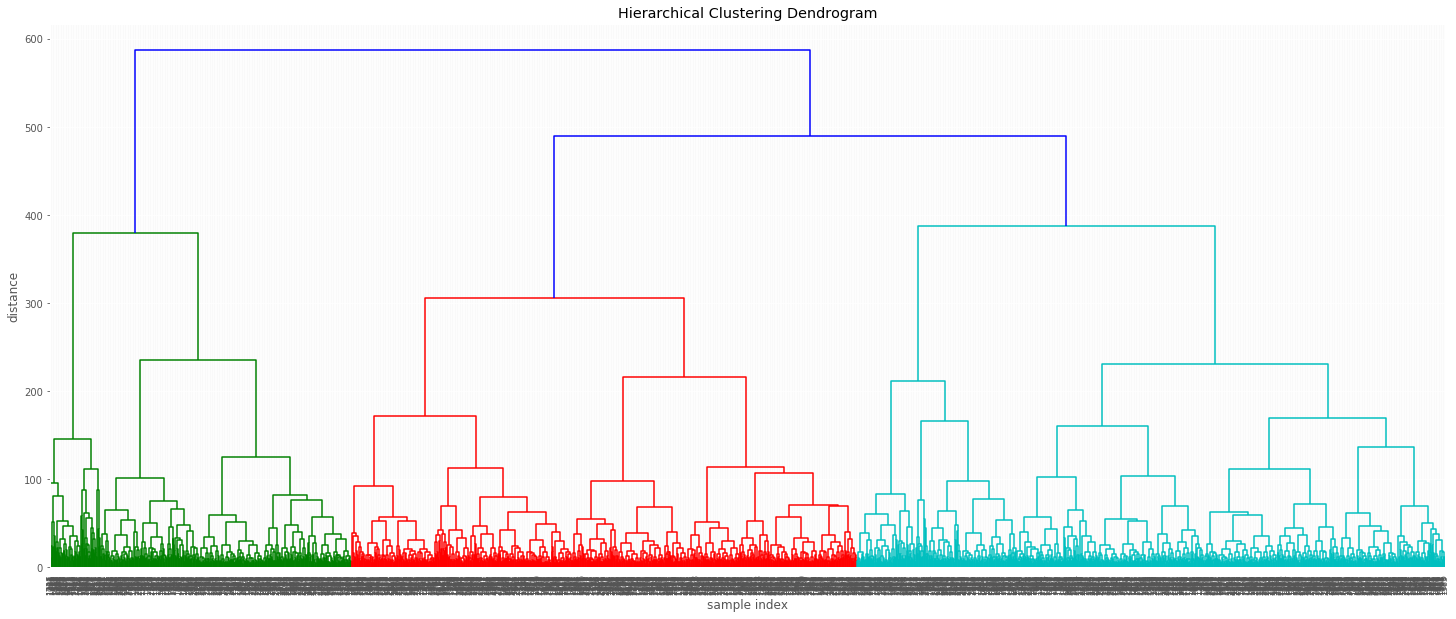

In [66]:
Z = linkage(career_data, 'ward') # generate the linkage array
print(Z[:5])
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
